## TWITTER SENTIMENT ANALYSIS
**Description : This is a sentiment analysis program that parses the tweets fetched from Twitter using Python**

Rule-based systems that perform sentiment analysis based on a set of manually crafted rules

Automatic systems that rely on machine learning techniques to learn from data

Hybrid systems that combine both rule-based and automatic approaches

In [2]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [4]:
ken_tweets= pd.read_csv('data/KenyaTweets.csv')
sa_tweets = pd.read_csv('data/SouthAfricaTweets.csv')
ng_tweets = pd.read_csv('data/NigeriaTweets.csv')

In [6]:
ken_tweets.head()

,timestamp,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,2020-09-20 22:44:45+00:00,Sun Sep 20 22:44:45 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Why is #covid a problem in #Kenya with 93%no s...,"Why problem symptoms,1.7 fatality rate many pe...","Sentiment(polarity=0.25, subjectivity=0.3125)",0.25,0.3125,en,2,2,KeCheza,False,"covid, Kenya, DiningAtTheDumpsite, komeshacoro...","KTNNewsKE, ntvkenya, citizentvkenya, K24Tv",NaN,Global #ChezaKe
1,2020-09-20 22:48:46+00:00,Sun Sep 20 22:48:46 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @KeCheza: Why is #covid a problem in #Kenya...,"Why problem symptoms,1.7 fatality rate many pe...","Sentiment(polarity=0.5, subjectivity=0.5)",0.5,0.5,en,0,2,KeCheza,NaN,"covid, Kenya",KeCheza,NaN,Global #ChezaKe
2,2020-09-21 02:35:45+00:00,Mon Sep 21 02:35:45 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",@ItsARideMan @robinhanson You can help end hun...,You help end hunger Kenya Uganda Rwanda Liberi...,"Sentiment(polarity=-0.21666666666666667, subje...",-0.21666666666666667,0.3333333333333333,en,0,1,mllichti,False,NaN,"ItsARideMan, robinhanson",NaN,NaN
3,2020-09-21 02:49:36+00:00,Mon Sep 21 02:49:36 +0000 2020,"<a href=""http://www.hotspot.ug"" rel=""nofollow""...",RT @mllichti: @ItsARideMan @robinhanson You ca...,You help end hunger Kenya Uganda Rwanda Liberi...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,0,1,LugamboBlog,False,NaN,"mllichti, ItsARideMan, robinhanson",NaN,"Kampala, Uganda"
4,2020-09-21 05:06:35+00:00,Mon Sep 21 05:06:35 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",@WilliamsRuto Hon.D.P.Dr.W.S.Ruto.Thanks to Go...,Hon.D.P.Dr.W.S.Ruto.Thanks God hunger HIMAsk P...,"Sentiment(polarity=0.25, subjectivity=0.3)",0.25,0.3,en,0,0,k_mangua,NaN,NaN,WilliamsRuto,NaN,"Kiambu, Kenya"


In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


In [19]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink

    return text


In [20]:
ken_tweets['tweets'] = ken_tweets['original_text'].apply(cleanTxt)

In [8]:
ken_tweets.shape

(2245, 17)

In [13]:
ng_tweets.shape

(4062, 17)

In [14]:
sa_tweets.shape

(2272, 17)

### EXPLORATION (kenya tweets)

In [30]:
def draw_wordcloud(tweets_series, country):
    # word cloud visualization
    allWords = ' '.join([twts for twts in tweets_series])
    wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
    plt.figure(figsize=(12, 9))
    plt.imshow(wordCloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Most used words describing Food Quality in {country}', size=20)
    plt.show()

In [26]:
ng_tweets['tweets'] = ng_tweets['original_text'].apply(cleanTxt)
sa_tweets['tweets'] = sa_tweets['original_text'].apply(cleanTxt)

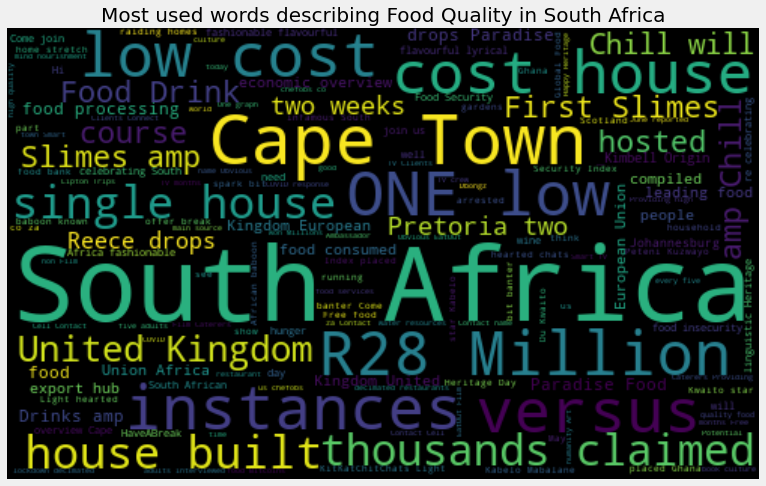

In [31]:
draw_wordcloud(sa_tweets['tweets'], 'South Africa')

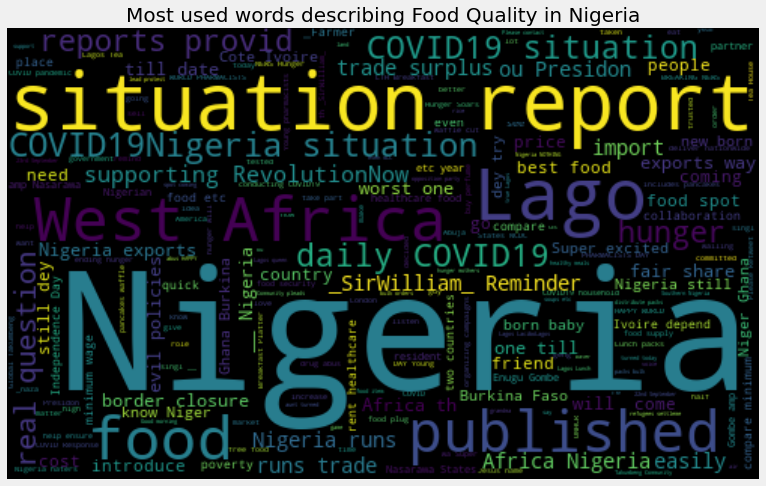

In [32]:
draw_wordcloud(ng_tweets['tweets'], 'Nigeria')

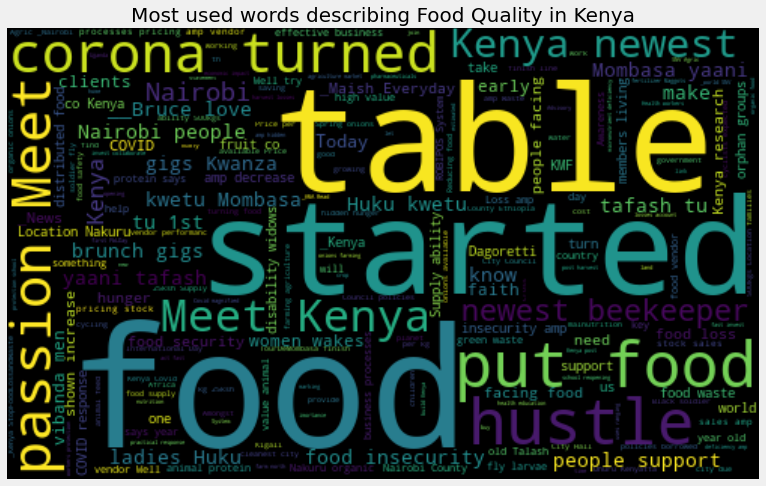

In [33]:
draw_wordcloud(ken_tweets['tweets'], 'Kenya')

Create a new column for subjectivity and polarity using defined functions

In [34]:
# for kenya
ken_tweets['N_Subjectivity'] = ken_tweets['tweets'].apply(getSubjectivity)
ken_tweets['N_Polarity'] = ken_tweets['tweets'].apply(getPolarity)

# for sa
sa_tweets['N_Subjectivity'] = sa_tweets['tweets'].apply(getSubjectivity)
sa_tweets['N_Polarity'] = sa_tweets['tweets'].apply(getPolarity)

# for Nigeria
ng_tweets['N_Subjectivity'] = ng_tweets['tweets'].apply(getSubjectivity)
ng_tweets['N_Polarity'] = ng_tweets['tweets'].apply(getPolarity)

**Get Sentiment using Polarity**

In [36]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
ken_tweets['Analysis'] = ken_tweets['N_Polarity'].apply(getAnalysis)
sa_tweets['Analysis'] = sa_tweets['N_Polarity'].apply(getAnalysis)
ng_tweets['Analysis'] = ng_tweets['N_Polarity'].apply(getAnalysis)




In [37]:
# Printing positive tweets for kenya tweets
print('Printing positive tweets:\n')
j=1
kenya_df = ken_tweets.sort_values(by=['N_Polarity']) #Sort the tweets
for i in range(0, 100 ): #loop the entire tweets
    if( kenya_df['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ kenya_df['tweets'][i])
        print()
        j= j+1

Printing positive tweets:

1) Why is covid a problem in Kenya with 93%no symptoms,1.7%fatality rate while many people are dying of hunger,other diseases,thirst,drought,floods,lack
of basic needs?😮🤔DiningAtTheDumpsite komeshacorona KOTLoyals kot newsgang    24Tv 

2) : Why is covid a problem in Kenya with 93%no symptoms,1.7%fatality rate while many people are dying of hunger,other diseases,t…

3)  Hon.D.P.Dr.W.S.Ruto.Thanks to God for your hunger for HIM
Ask Parliament to work on the Petition for replacing the word on the coat of arms with"KENYA".It should not read"Harambee".God Commanded. I told you by letters.God is greater over human. HEED.

4) Eating traditional whole grains can reduce HiddenHunger, improving health and boosting prosperity. Our Expert Group is developing a value chain for better nutrition in Kenya. Learn more:  cc   _Movement _africa 

5) : Eating traditional whole grains can reduce HiddenHunger, improving health and boosting prosperity. Our Expert Group is deve…

6

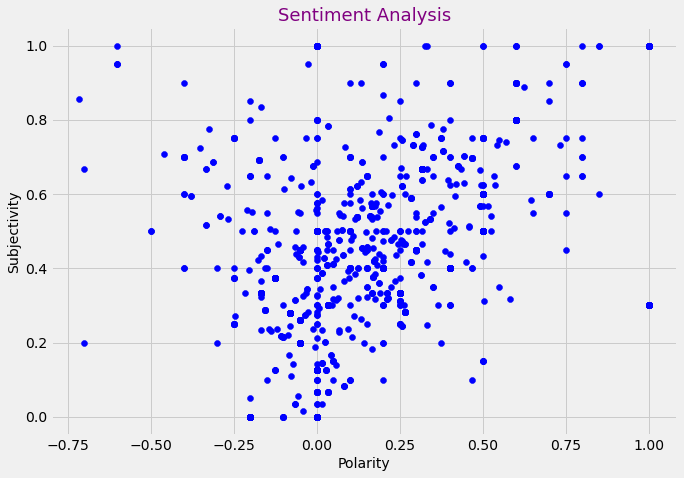

In [41]:
# Plotting 
plt.figure(figsize=(10,7)) 
for i in range(0, ken_tweets.shape[0]):
    plt.scatter(ken_tweets["N_Polarity"][i], ken_tweets["N_Subjectivity"][i], color='b') 
plt.title('Sentiment Analysis', size=18, color='purple') 
plt.xlabel('Polarity', fontsize=14) 
plt.ylabel('Subjectivity', fontsize=14) 
plt.show()

From the chart, we can derive and hypothesizes that:
1. when a tweet has high subjectivity, it is a negative kind of tweet
2. Many of the tweets were positive 
3. An Average Subjectivity value ends to have a positive sentiment

In [42]:
# Print the percentage of positive tweets
ptweets = ken_tweets[ken_tweets.Analysis == 'Positive']
ptweets = ptweets['tweets']
# ptweets

round( (ptweets.shape[0] / ken_tweets.shape[0]) * 100 , 1)

40.4

In [43]:
# Print the percentage of negative tweets
ptweets = ken_tweets[ken_tweets.Analysis == 'Negative']
ptweets = ptweets['tweets']
# ptweets

round( (ptweets.shape[0] / ken_tweets.shape[0]) * 100 , 1)

19.2

In [44]:
# Print the percentage of neutral tweets
ptweets = ken_tweets[ken_tweets.Analysis == 'Neutral']
ptweets = ptweets['tweets']
# ptweets

round( (ptweets.shape[0] / ken_tweets.shape[0]) * 100 , 1)

40.5